In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import email
import email.policy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random

In [3]:
ham_filenames = [name for name in sorted(os.listdir(r'E:\Education\hamnspam\ham')) if len(name)>20]
spam_filenames = [name for name in sorted(os.listdir(r'E:\Education\hamnspam\ham')) if len(name)<20]

ham_filenames

['0001.ea7e79d3153e7469e7a9c3e0af6a357e',
 '0002.b3120c4bcbf3101e661161ee7efcb8bf',
 '0003.acfc5ad94bbd27118a0d8685d18c89dd',
 '0004.e8d5727378ddde5c3be181df593f1712',
 '0005.8c3b9e9c0f3f183ddaf7592a11b99957',
 '0006.ee8b0dba12856155222be180ba122058',
 '0007.c75188382f64b090022fa3b095b020b0',
 '0008.20bc0b4ba2d99aae1c7098069f611a9b',
 '0009.435ae292d75abb1ca492dcc2d5cf1570',
 '0010.4996141de3f21e858c22f88231a9f463',
 '0011.07b11073b53634cff892a7988289a72e',
 '0012.d354b2d2f24d1036caf1374dd94f4c94',
 '0013.ff597adee000d073ae72200b0af00cd1',
 '0014.532e0a17d0674ba7a9baa7b0afe5fb52',
 '0015.a9ff8d7550759f6ab62cc200bdf156e7',
 '0016.d82758030e304d41fb3f4ebbb7d9dd91',
 '0017.d81093a2182fc9135df6d9158a8ebfd6',
 '0018.ba70ecbeea6f427b951067f34e23bae6',
 '0019.a8a1b2767e83b3be653e4af0148e1897',
 '0020.ef397cef16f8041242e3b6560e168053',
 '0021.f8e73bdba7277d967af4d561f0402129',
 '0022.7241da4491c49b50c0470a3638ee35c4',
 '0023.b4a61a2990263e8825246e41a8d78399',
 '0024.771af861a302951df7630ec4ff1

In [ ]:
def load_email(is_spam, filename):
    directory = r'D:\hamnspam\spam' if is_spam else r'D:\hamnspam\ham'
    with open(os.path.join(directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string
import re

In [ ]:
stops=set(stopwords.words('english'))
punc=list(string.punctuation)
stops.update(['-','http','yahoo','google','_'])
stops.update(punc)
stops

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'google',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk import pos_tag

In [ ]:
def simple_tag(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def clean_n(words):
    l=[]
    word=word_tokenize(words.lower())
    for s in word:
        if s in stops or len(s)<=2 or not(s.isalpha()):
            continue
            
        l.append(s)
    c=[lemmatizer.lemmatize(w,simple_tag(w)) for w in l]
            
    return c


In [ ]:
def html_to_plain(mail):
    mail = mail.get_content()
    return BeautifulSoup(mail, 'html.parser').text.replace('\n\n', '')

In [ ]:
def email_to_plain(email):
    mail_content_type = email.get_content_type()
    content = ''

    if mail_content_type == 'text/plain':
        content = (email.get_content().replace('-', ''))
    elif mail_content_type == 'text/html':
        content = (html_to_plain(email).replace('-', ''))
    
    content = re.sub(r'http\S+', '', content)
    return clean_n(content)

In [ ]:
all_mails=[]
for mail in ham_emails:
    all_mails.append((email_to_plain(mail),'ham'))

In [ ]:
for mail in spam_emails:
    try:
        mail.get_content()
    except LookupError:
        continue
    all_mails.append((email_to_plain(mail), 'spam'))

In [ ]:
random.shuffle(all_mails)


In [ ]:
all_words=[]
for doc,cc in all_mails:
    all_words+=doc

In [ ]:
m={}
for i in all_words:
    if i in m:
        m[i]+=1
    else:
        m[i]=1
sorted_dict=sorted(m.items(),key=lambda x:x[1],reverse=True)
print(len(sorted_dict))


    

24553


In [ ]:
x=np.arange(1,len(sorted_dict)+1)
y= (np.ones(len(sorted_dict)))*3000
n=[]
for j in range(len(sorted_dict)):
    n.append(sorted_dict[j][1])

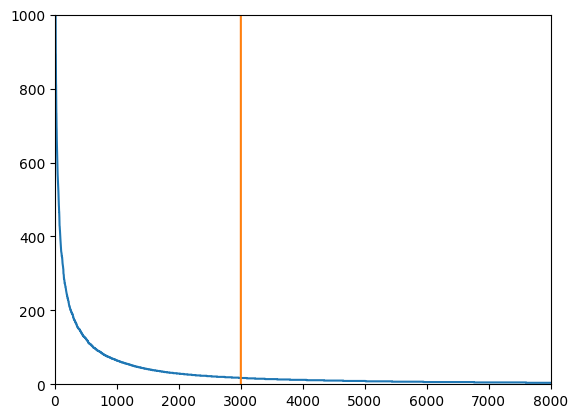

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, n)
plt.plot(y,x)
plt.axis([0,8000,0,1000])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=[" ".join(d) for d,v in all_mails]
Y=[v for d,v in all_mails]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [ ]:
len(X_train),len(X_test)

(2213, 738)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
a=CountVectorizer(max_features=3000)
x_features=a.fit_transform(X_train)
y_features=a.transform(X_test)

In [ ]:
x_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
a.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 3000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifier=RandomForestClassifier()
classifier.fit(x_features,Y_train)

RandomForestClassifier()

In [ ]:
print(classifier.score(y_features,Y_test))
print(classifier.score(x_features,Y_train))

0.989159891598916
0.9972887483054677


In [ ]:
y_predict=classifier.predict(y_features)

In [ ]:
confusion_matrix(y_predict,Y_test)

array([[638,   8],
       [  0,  92]], dtype=int64)

In [ ]:
mails = [ham_emails[11].get_content()]
mail = 'you are selected in interview'

mail = a.transform(mails)
classifier.predict(mail)

array(['ham'], dtype='<U4')

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier,open('Emailspam.pkl','wb'))

In [ ]:
o=pickle.load(open('Emailspam.pkl','rb'))

In [ ]:
o.predict(mail)

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
import pickle
pickle.dump(a,open('c.pkl','wb'))
p=pickle.load(open('c.pkl','rb'))
k=p.transform(mails)
classifier.predict(k)


array(['ham'], dtype='<U4')